In [3]:
import numpy as np
import matplotlib.pyplot as plt
import DataPreprocessing

In [6]:
def graph_data(me_filename, mom_filename, comb_str):    
    me_raw = np.load(me_filename, allow_pickle=True) #Matrix elements
    mom_raw = np.load(mom_filename, allow_pickle=True, encoding='bytes') #4-momenta of inputs
    mom_raw = np.array([np.array(element) for element in mom_raw])
    ##Flatten Momentum
    mom = np.array([np.ndarray.flatten(np.array(element)) for element in mom_raw])

    return (me_raw, DataPreprocessing.mandel_creation([comb_str], mom)[0])

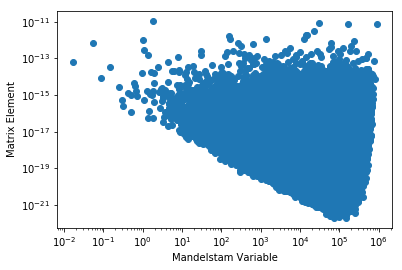

In [26]:
me, S = graph_data('LO/MG_uuuuxuxux/me_6jet_500000.npy', 'LO/MG_uuuuxuxux/mom_6jet_500000.npy', '1,4')

plt.yscale('log')
plt.xscale('log')

plt.ylabel('Matrix Element')
plt.xlabel('Mandelstam Variable')
plt.scatter(S, me)